Index(['Date', 'Time', 'X', 'Y', 'Z'], dtype='object')
Index(['Date', 'Time', 'X', 'Y', 'Z'], dtype='object')
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.25
0.75


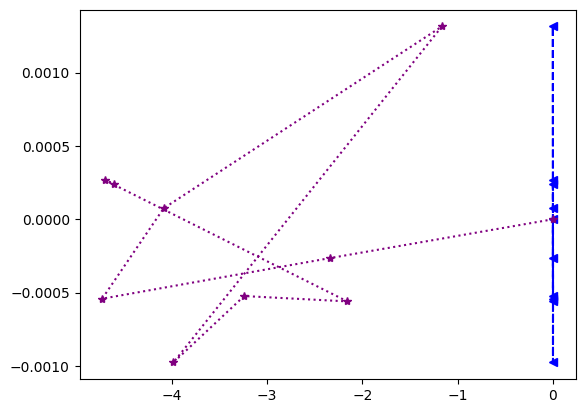

In [4]:
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"

import pandas as pd
import numpy as np
from scipy import stats
from sklearn import svm
import matplotlib.pyplot as plt

dt1=pd.read_csv('movement.csv')
print(dt1.columns)
dt1=dt1[['X', 'Y', 'Z']]


segment_size=10 # number of rows in file to be used [each time]
number_of_feat=18 # we need to make empty array of 18 to match the 6 features X 3 columns we are calculating
number_of_sample=10 # actually number of iterations (not sample as in row! Sample as in each chunk 'sample')

features1=np.zeros([number_of_sample,number_of_feat])
label1=np.zeros([number_of_sample])
for i in range(1, number_of_sample):
  tmp=stats.describe(dt1.iloc[segment_size *(i-1)+1:segment_size*i]) # for 10 (num of samples) iterations, extract from 10 rows in the file default descriptive (.describe) values (pre-programmed by Python) each iteration is calulated by mathematical algorithm that ensures each row is selceted in a 10 batch and none are missed. iloc is the instruction to take that chunk of 100.
  features1[i]=np.concatenate((tmp[1][0], tmp[1][1], tmp[2], tmp[3], tmp[4], tmp[5]))
  # feature1 EMPTY ARRAY at start (np.zeros), by the end there will a matric of 10 X 18 (6 features for each column X Y Z, the first two of which are not single values but a pair - see google: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html) DETAILS NO HELD IN FEATURES

dt2=pd.read_csv('stationary.csv')
print(dt2.columns)
dt2=dt2[['X', 'Y', 'Z']]

features2=np.zeros([number_of_sample,number_of_feat])
label2=np.ones([number_of_sample]) # CHANGE TO ONES AS DIFFERENT CLASS (different activity, stationary still, creates vector where all values 1, each 1 representing that value belongs to class 1, to activity 1)
for i in range(1, number_of_sample):
  tmp=stats.describe(dt2.iloc[segment_size *(i-1)+1:segment_size*i])

  features2[i]=np.concatenate((tmp[1][0], tmp[1][1], tmp[2], tmp[3], tmp[4], tmp[5]))
# starting from 1 (0 nobs not used!) tmp[1][0] min and tmp[1][1] max are from same tuple, but for X Y Z, [2]mean, [3]var , [4]skew, [5]kurt
# 6 features organised as above (BUT first two are labelled within min/max - as 0 nobs not included - as nobs same for all features, so useless to analysis!) 6 x 3 is 18

#classification
all_data=np.append(features1,features2,0)
all_label=np.append(label1,label2,0) # class1, class2, and 0 parameter (direction to concatenate)

clf=svm.LinearSVC() # creates classifier object
clf.fit(all_data, all_label) # train classifier using our data

prediction=clf.predict(all_data)
print(prediction) # outcome of each classified row (array is 20 items - 10 iterations of class 1 and 10 iterations of class 2)

err=0
for i in range(0, len(prediction)):
  if (prediction[i] != all_label[i]):
    err+=1

err=err/len(all_label)*100

err = err/len(all_label)
print(err) # margin of error (not landing correctly on either side of the diagonal line )
accuracy=1-err
print(accuracy) # 0.75 (on the correct side of line)


# GRAPH PLOTTING _______________________
plt.plot(features2[:, 0], features2[:,1], '--<',color='blue')
# also try print(np.size(features2[:,0]))

plt.plot(features1[:, 0], features2[:,1], ':*', color='purple')
plt.show()
# when purple line drawn, points are the result
# graph end here
# GRAPH PLOTTING _______________________